# Netflix Case Study:

**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Netflix dataset and create a dataframe for analysis
netdf = pd.read_csv('netflix.csv', encoding = 'utf-8', encoding_errors = 'ignore')

# Print the first 5 rows
netdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Print the last 5 rows
netdf.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
# Print the shape of the dataframe
netdf.shape

(8807, 12)

In [5]:
# Statistical summary of the numerical columns of the dataframe
netdf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# Data type of the attributes of the dataframe
netdf.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [7]:
# Info on the dataframe
netdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
# Check for missing values and their percentage
missing_values = netdf.isnull().sum()
missing_percentage = (netdf.isnull().sum() / len(netdf)) * 100

# Combine into a dataFrame for better readability
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df

,Missing Values,Percentage (%)
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,7,0.079482
duration,0,0.000000


**The director column contains 30% null values. Cast and Country columns contain around 9% missing values. Since, these columns are categorical, filling with a mode or median (if applicable) might inaccurately represent the data. Filling them arbitrarily could obscure this and lead to incorrect conclusions. Date_added and rating have the least null values. Based on this information, the rows/records containing null values were dropped from the netdf dataframe.**




In [9]:
# Drop the redundant columns
netdf = netdf.drop(['show_id', 'date_added', 'description'], axis = 1)
netdf

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [10]:
# Drop the missing values
netdf.dropna(subset = ['rating', 'cast', 'country', 'director'], inplace = True)
print(netdf.shape)

(5332, 9)


In [11]:
netdf.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas"
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niew̦hner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [12]:
# Reset the index of the dataframe after removing the null values
netdf = netdf.reset_index(drop = True)
netdf.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas"
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niew̦hner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [13]:
# Check for duplicate data and drop the duplicates
duplicate_rows_df = netdf[netdf.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
netdf = netdf.drop_duplicates()
print(netdf.shape)

number of duplicate rows:  (3, 9)
(5329, 9)


**There are 3 rows with duplicate records. These duplicate records were removed from the netdf dataframe with the drop_duplicates() function.**

# Feature Analysis on Movies and TV Shows

In [14]:
netdf

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas"
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niew̦hner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
...,...,...,...,...,...,...,...,...,...
5327,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
5328,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
5329,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies"
5330,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [15]:
# Value counts of the "type" feature
type_netdf = netdf['type'].value_counts().to_frame().reset_index()
type_netdf = type_netdf.rename(columns = {'type': 'content_type'})
type_netdf

,content_type,count
0,Movie,5182
1,TV Show,147


**The dataset contains very few entries of tv shows compared to movies. A recommendation would be to collect more data on tv shows, more focus on tv shows than movies.**

In [16]:
# Display the records of TV Shows only
tvshow = netdf[netdf['type'] == 'TV Show']
tvshow

,type,title,director,cast,country,release_year,rating,duration,listed_in
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
92,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
120,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
121,TV Show,Valeria,Inma Torrente,"Diana G_mez, Silma L_pez, Paula Malia, Teresa ...",Spain,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa..."
131,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,2021,TV-MA,1 Season,TV Shows
...,...,...,...,...,...,...,...,...,...
4880,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,2015,TV-Y7,1 Season,"Kids' TV, TV Comedies"
4906,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV..."
4969,TV Show,The Fear,Michael Samuels,"Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...",United Kingdom,2012,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas"
4977,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,2016,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas"


In [17]:
# Top 20 genres in TV Shows
tvshow_genres = tvshow['listed_in'].str.split(", ").explode().value_counts().to_frame().reset_index().head(20)
tvshow_genres = tvshow_genres.rename(columns = {'listed_in': 'genre'})
tvshow_genres

,genre,count
0,International TV Shows,87
1,TV Dramas,52
2,Crime TV Shows,38
3,TV Comedies,30
4,Romantic TV Shows,21
5,British TV Shows,21
6,Docuseries,14
7,TV Action & Adventure,13
8,Kids' TV,13
9,Stand-Up Comedy & Talk Shows,11


In [18]:
# Get the top 10 genres in tv shows
tvshow_genres_filtered = tvshow_genres.head(10)
tvshow_genres_filtered

,genre,count
0,International TV Shows,87
1,TV Dramas,52
2,Crime TV Shows,38
3,TV Comedies,30
4,Romantic TV Shows,21
5,British TV Shows,21
6,Docuseries,14
7,TV Action & Adventure,13
8,Kids' TV,13
9,Stand-Up Comedy & Talk Shows,11


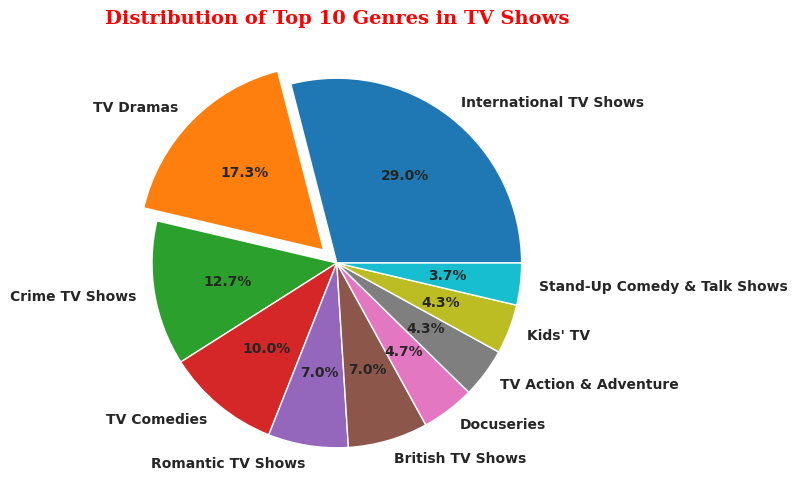

In [19]:
# Distribution of top 10 genres in tv shows

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
sns.set_style("dark")
plt.figure(figsize = (10,6))
plt.pie(tvshow_genres_filtered['count'], labels = tvshow_genres_filtered['genre'], autopct = '%1.1f%%', explode = explode, textprops = {'weight': 'bold'})
plt.title('Distribution of Top 10 Genres in TV Shows', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)
plt.show()

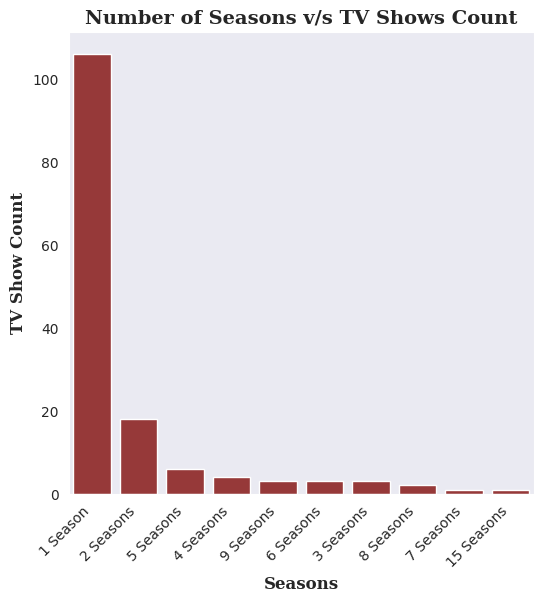

In [20]:
# Countplot of Number of Seasons v/s TV Shows Count

plt.figure(figsize = (6,6))
sns.countplot(data = tvshow, x = 'duration', order = tvshow['duration'].value_counts().index, color = 'brown')

plt.xticks(rotation = 45, ha = 'right')
plt.title('Number of Seasons v/s TV Shows Count', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Seasons', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('TV Show Count', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

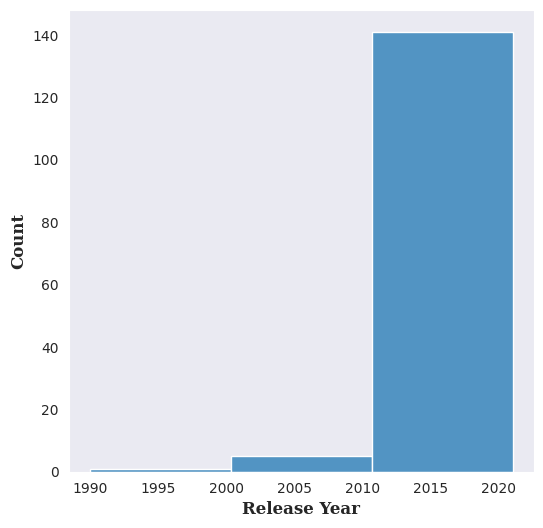

In [21]:
# Release Year distribution of TV Shows

plt.figure(figsize = (6,6))
sns.histplot(data = tvshow, x = 'release_year', bins = 3)

plt.xlabel('Release Year', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.show()

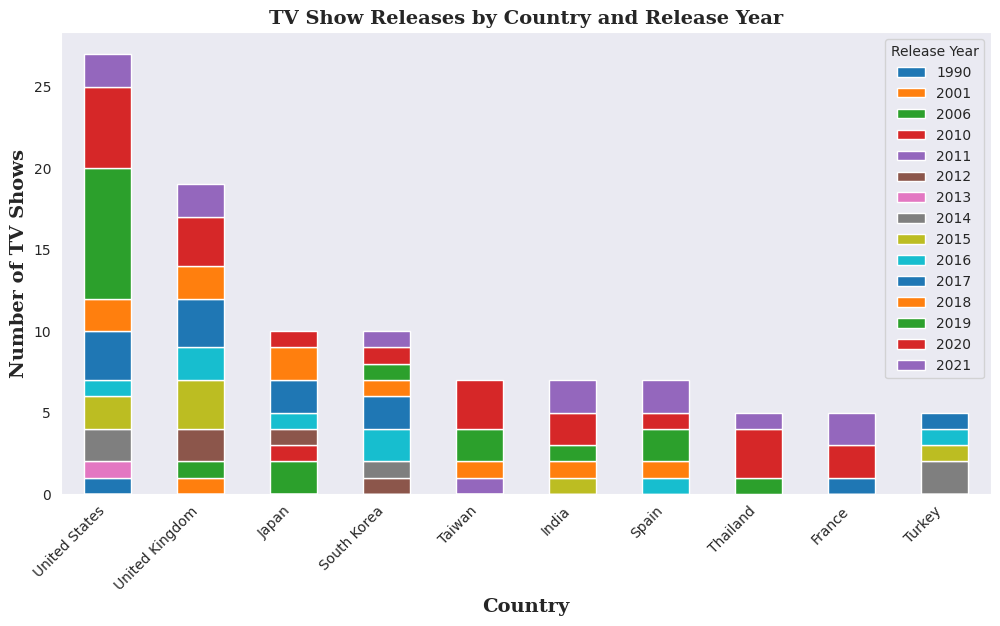

In [22]:
# Group by country and release_year counting TV shows
tvshow_country_year = tvshow.groupby(['country', 'release_year']).size().unstack(fill_value = 0)

# Select top N countries (e.g., top 10) to avoid clutter
top_countries = tvshow['country'].value_counts().head(10).index
tvshow_country_year = tvshow_country_year.loc[top_countries]

# Plot stacked bar chart

tvshow_country_year.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('TV Show Releases by Country and Release Year', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Country', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Number of TV Shows', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Release Year', loc = 'best')
plt.grid(False)
plt.show()

In [23]:
# Display the records of Movies only
movies = netdf[netdf['type'] == 'Movie']
movies

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas"
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niew̦hner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
5,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2010,PG-13,103 min,Comedies
...,...,...,...,...,...,...,...,...,...
5327,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
5328,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
5329,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies"
5330,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies"


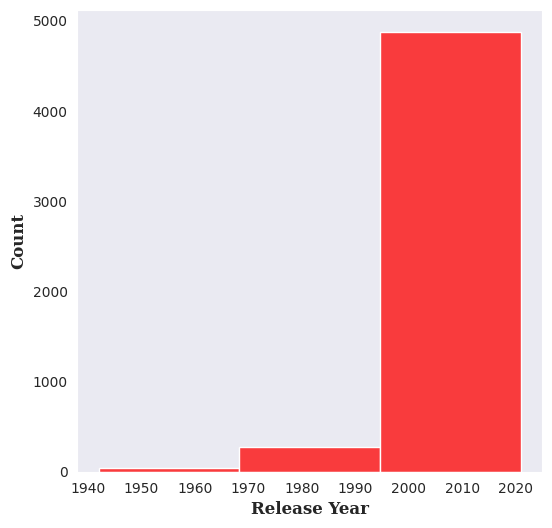

In [24]:
# Release Year distribution of Movies

plt.figure(figsize = (6,6))
sns.histplot(data = movies, x = 'release_year', bins = 3, color = 'r')

plt.xlabel('Release Year', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.show()

In [25]:
# Top 10 genres in Movies
movies_genres = movies['listed_in'].str.split(", ").explode().value_counts().to_frame().reset_index().head(10)
movies_genres = movies_genres.rename(columns = {'listed_in': 'genre'})
movies_genres

,genre,count
0,International Movies,2368
1,Dramas,2290
2,Comedies,1552
3,Action & Adventure,806
4,Independent Movies,739
5,Romantic Movies,579
6,Thrillers,545
7,Children & Family Movies,503
8,Documentaries,391
9,Horror Movies,336


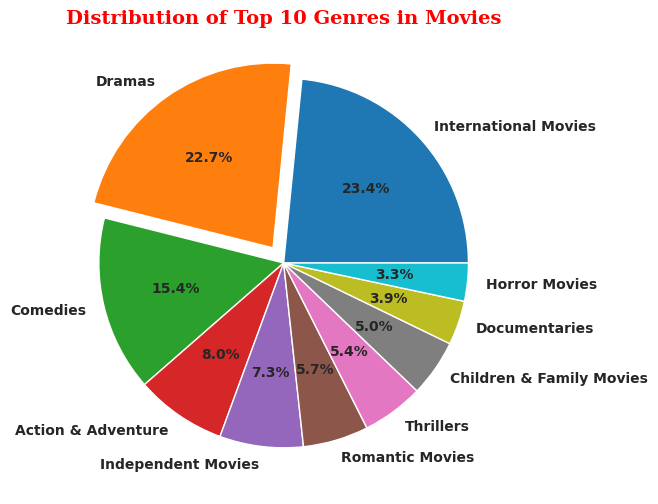

In [26]:
# Distribution of Top 10 Genres in Movies

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
sns.set_style("dark")
plt.figure(figsize = (10,6))
plt.pie(movies_genres['count'], labels = movies_genres['genre'], autopct = '%1.1f%%', explode = explode, textprops = {'weight': 'bold'})
plt.title('Distribution of Top 10 Genres in Movies', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)
plt.show()

# Analysis on the remaining features

In [27]:
netdf

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas"
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niew̦hner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
...,...,...,...,...,...,...,...,...,...
5327,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
5328,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
5329,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies"
5330,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [28]:
# Number of unique director names
netdf['director'].nunique()

3945

In [29]:
# Number of occurrences of all the unique directors
netdf['director'].value_counts()

,count
director,
"Ra̼l Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
...,...
Theodore Melfi,1
Ashish R. Mohan,1
Haile Gerima,1


In [30]:
# List of all the unique director names
director_netdf = netdf['director'].str.split(", ").explode().value_counts().to_frame().reset_index()
director_netdf = director_netdf.rename(columns = {'director': 'director_name'})
director_netdf

,director_name,count
0,Jan Suter,21
1,Ra̼l Campos,19
2,Marcus Raboy,15
3,Jay Karas,15
4,Cathy Garcia-Molina,13
...,...,...
4306,Nicholaus Goossen,1
4307,Stig Bergqvist,1
4308,Paul Demeyer,1
4309,Igor Kovalyov,1


In [31]:
# List of all the unique actor names
actor_netdf = netdf['cast'].str.split(", ").explode().value_counts().to_frame().reset_index()
actor_netdf = actor_netdf.rename(columns = {'cast': 'actor_name'})
actor_netdf

,actor_name,count
0,Anupam Kher,42
1,Shah Rukh Khan,34
2,Naseeruddin Shah,31
3,Akshay Kumar,30
4,Om Puri,30
...,...,...
25453,Baljinder Kaur,1
25454,Sukhdev Barnala,1
25455,Ranjan Sehgal,1
25456,Anjum Batra,1


In [32]:
# Value counts of the "country" feature
netdf['country'].value_counts()

,count
country,
United States,1846
India,874
United Kingdom,183
Canada,107
Spain,91
...,...
"United States, United Kingdom, France, Germany, Japan",1
"Spain, France, United States",1
"Indonesia, South Korea, Singapore",1


In [33]:
# List of all the countries where the movie/show was produced
country_netdf = netdf['country'].str.split(", ").explode().value_counts().to_frame().reset_index()
country_netdf = country_netdf.rename(columns = {'country': 'country_name'})
country_netdf

,country_name,count
0,United States,2484
1,India,939
2,United Kingdom,484
3,Canada,295
4,France,293
...,...,...
108,Somalia,1
109,Sudan,1
110,Panama,1
111,East Germany,1


In [34]:
# Create categories of decades along with the number of movies produced in each decade
print("Earliest Release Year: ", netdf['release_year'].min())
print("Latest Release Year: ", netdf['release_year'].max())
print("\n")

bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030]
labels = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
pd.cut(netdf['release_year'], bins = bins, labels = labels).value_counts().to_frame().reset_index()

Earliest Release Year:  1942
Latest Release Year:  2021




,release_year,count
0,2010s,3926
1,2000s,769
2,1990s,242
3,2020s,161
4,1980s,119
5,1970s,72
6,1960s,21
7,1950s,14
8,1940s,5
9,1930s,0


In [35]:
# Listing the occurrences of different type of ratings issued to each movie/tv show
rating_netdf = netdf['rating'].value_counts().to_frame().reset_index()
rating_netdf

,rating,count
0,TV-MA,1821
1,TV-14,1213
2,R,777
3,PG-13,470
4,TV-PG,431
5,PG,275
6,TV-G,84
7,TV-Y7,76
8,TV-Y,76
9,NR,58


In [36]:
# Function to extract duration value
def extract_duration(duration):
    if pd.isna(duration):
        return None
    if 'min' in duration:
        return int(duration.split(' ')[0])
    elif 'Season' in duration or 'Seasons' in duration:
        return int(duration.split(' ')[0])
    return None

# Apply preprocessing and add the column to the netdf dataframe
netdf['duration_value'] = netdf['duration'].apply(extract_duration)
netdf.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,duration_value
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",9
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",104
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niew̦hner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",127
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",166


In [37]:
# Listing the occurrences of different genres
netdf['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",336
Stand-Up Comedy,286
"Comedies, Dramas, International Movies",257
"Dramas, Independent Movies, International Movies",243
"Children & Family Movies, Comedies",179
...,...
"Action & Adventure, Romantic Movies, Sci-Fi & Fantasy",1
"British TV Shows, Classic & Cult TV, TV Comedies",1
"Action & Adventure, Comedies, Horror Movies",1


In [38]:
# Listing all the genres by the count of movies/tv shows produced in each genre
cont_typ_netdf = netdf['listed_in'].str.split(", ").explode().value_counts().to_frame().reset_index()
cont_typ_netdf = cont_typ_netdf.rename(columns = {'listed_in': 'genre'})
cont_typ_netdf

,genre,count
0,International Movies,2368
1,Dramas,2290
2,Comedies,1552
3,Action & Adventure,806
4,Independent Movies,739
5,Romantic Movies,579
6,Thrillers,545
7,Children & Family Movies,503
8,Documentaries,391
9,Horror Movies,336


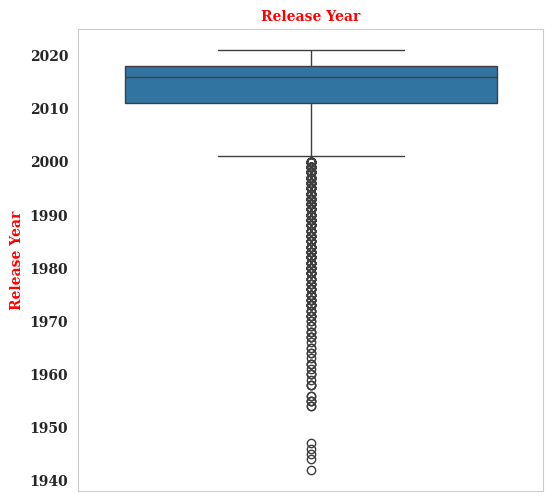

In [39]:
# Boxplot for release year

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
sns.boxplot(data = netdf, y = 'release_year')
plt.title('Release Year', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Release Year', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.yticks(fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

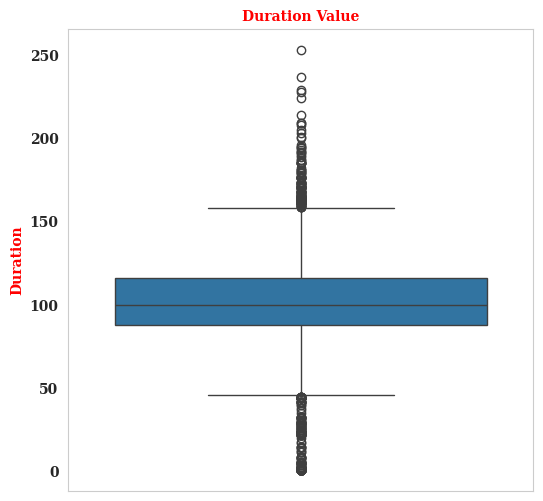

In [40]:
# Boxplot for duration_value

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
sns.boxplot(data = netdf, y = 'duration_value')
plt.title('Duration Value', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Duration', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.yticks(fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

# Univariate Visualization

In [41]:
netdf

,type,title,director,cast,country,release_year,rating,duration,listed_in,duration_value
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",9
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",104
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niew̦hner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",127
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",166
...,...,...,...,...,...,...,...,...,...,...
5327,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",96
5328,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",158
5329,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",88
5330,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies",88


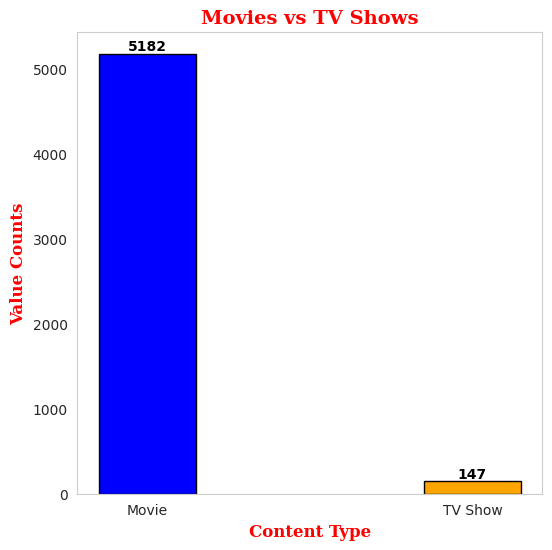

In [42]:
# barplot of type of show in the dataframe netdf

x = type_netdf['content_type']
y = type_netdf['count']

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
bars = plt.bar(x,y, width = 0.3, align = 'center', edgecolor = 'black', color = ['blue', 'orange'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}',
             ha = 'center', va = 'bottom', fontsize = 10, fontweight = 'bold', color = 'black')

plt.title('Movies vs TV Shows', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Content Type', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Value Counts', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)
plt.show()

In [43]:
# Get the top 20 directors
director_netdf_filtered = director_netdf.head(20)
director_netdf_filtered

,director_name,count
0,Jan Suter,21
1,Ra̼l Campos,19
2,Marcus Raboy,15
3,Jay Karas,15
4,Cathy Garcia-Molina,13
5,Martin Scorsese,12
6,Jay Chapman,12
7,Youssef Chahine,12
8,Steven Spielberg,11
9,Don Michael Paul,10


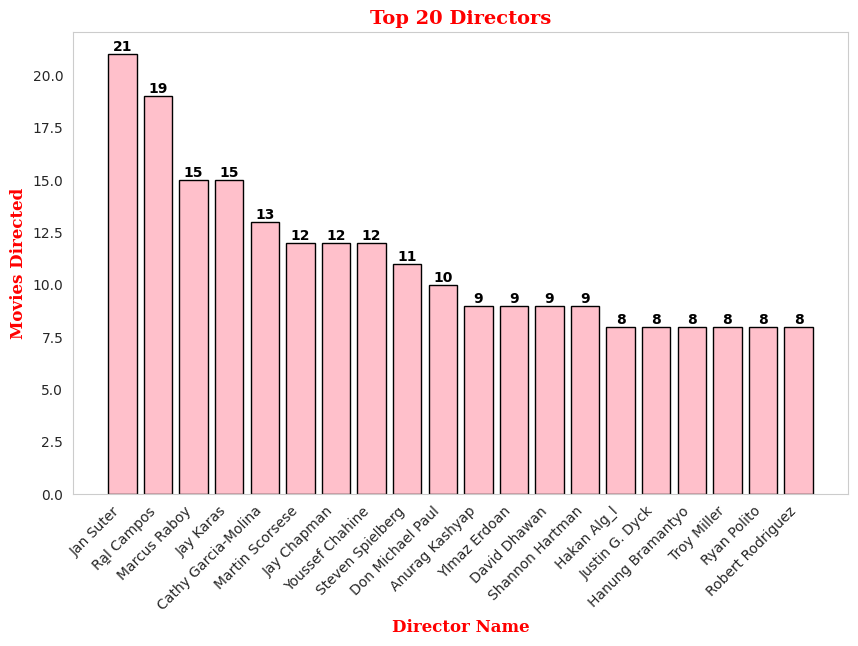

In [44]:
# barplot to display the top 20 directors by their value counts

x = director_netdf_filtered['director_name']
y = director_netdf_filtered['count']

sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
bars = plt.bar(x,y, edgecolor = 'black', color = 'pink')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}',
             ha = 'center', va = 'bottom', fontsize = 10, fontweight = 'bold', color = 'black')

plt.title('Top 20 Directors', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Director Name', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Movies Directed', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(False)
plt.show()

In [45]:
# Get the top 20 actors
actor_netdf_filtered = actor_netdf.head(20)
actor_netdf_filtered

,actor_name,count
0,Anupam Kher,42
1,Shah Rukh Khan,34
2,Naseeruddin Shah,31
3,Akshay Kumar,30
4,Om Puri,30
5,Amitabh Bachchan,28
6,Paresh Rawal,28
7,Boman Irani,27
8,Kareena Kapoor,25
9,Samuel L. Jackson,21


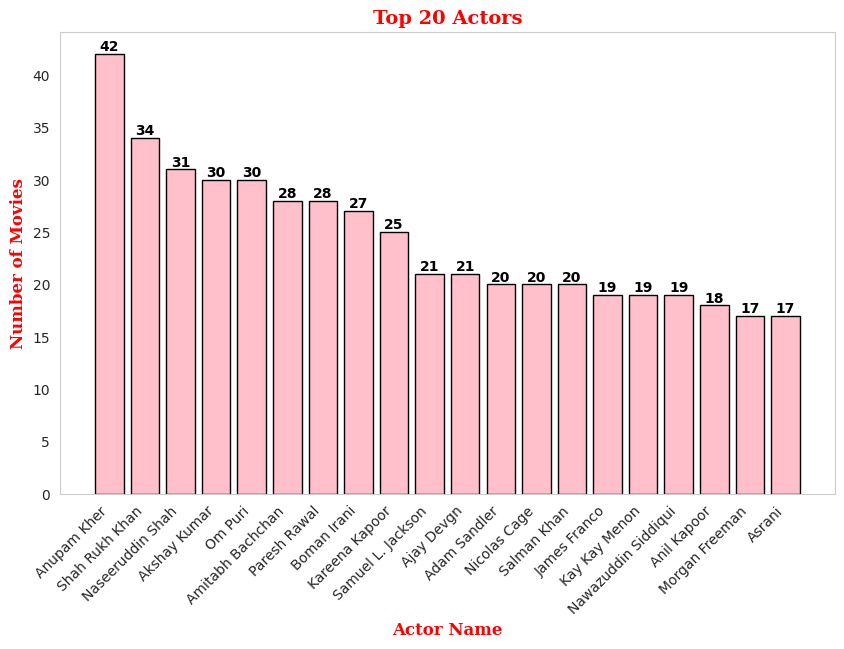

In [46]:
# barplot to display the top 20 actors by their value counts

x = actor_netdf_filtered['actor_name']
y = actor_netdf_filtered['count']

sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
bars = plt.bar(x,y, edgecolor = 'black', color = 'pink')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}',
             ha = 'center', va = 'bottom', fontsize = 10, fontweight = 'bold', color = 'black')

plt.title('Top 20 Actors', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Actor Name', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Number of Movies', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(False)
plt.show()

In [47]:
# Get the top 10 countries
country_netdf_filtered = country_netdf.head(10)
country_netdf_filtered

,country_name,count
0,United States,2484
1,India,939
2,United Kingdom,484
3,Canada,295
4,France,293
5,Germany,167
6,Spain,161
7,Japan,124
8,China,109
9,Mexico,101


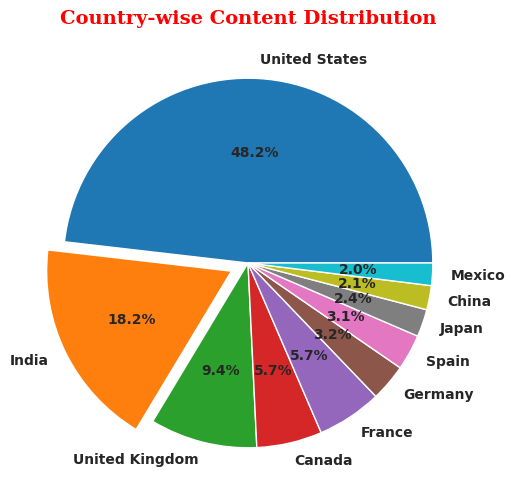

In [48]:
# piechart for country-wise content distribution

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
sns.set_style("dark")
plt.figure(figsize = (10,6))
plt.pie(country_netdf_filtered['count'], labels = country_netdf_filtered['country_name'], autopct = '%1.1f%%',
        explode = explode, textprops = {'weight': 'bold'})
plt.title('Country-wise Content Distribution', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)
plt.show()

In [49]:
# Create bins of release_year feature to visualize the trend in number of movies/shows over the years

bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030]
labels = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
release_yr_count = pd.cut(netdf['release_year'], bins = bins, labels = labels).value_counts().to_frame().reset_index()
release_yr_count.columns =['release_year', 'count']
release_yr_count

,release_year,count
0,2010s,3926
1,2000s,769
2,1990s,242
3,2020s,161
4,1980s,119
5,1970s,72
6,1960s,21
7,1950s,14
8,1940s,5
9,1930s,0


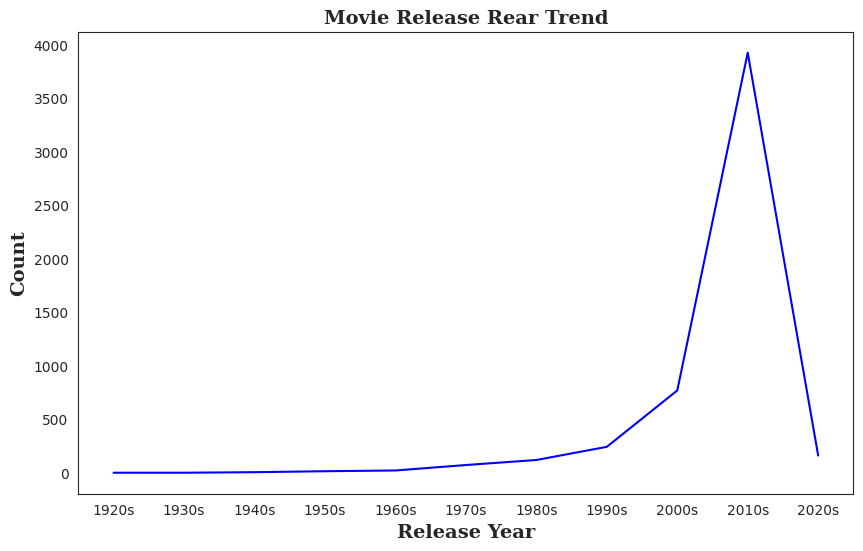

In [50]:
# linechart to visualize the trend in number of movies/shows over the years

x = release_yr_count['release_year']
y = release_yr_count['count']

plt.figure(figsize = (10,6))
sns.set_style("white")
sns.lineplot(data = release_yr_count, x = x, y = y, color = 'blue')
plt.title('Movie Release Rear Trend', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Release Year', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Count', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

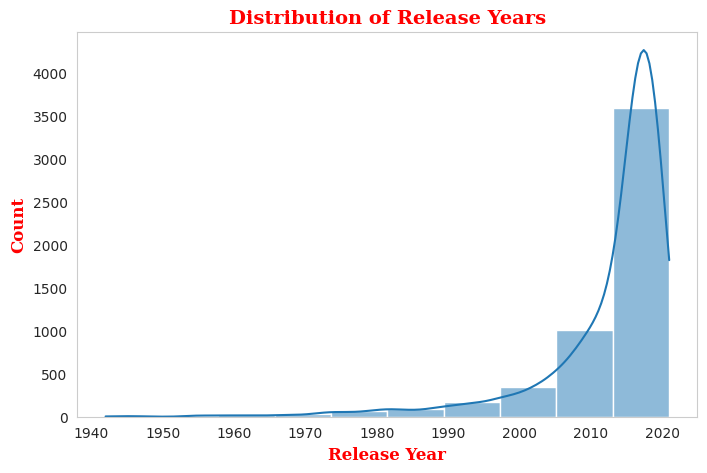

In [51]:
# histplot/kdeplot to visualize the trend in number of movies/shows over the years

sns.set_style("whitegrid")
plt.figure(figsize = (8, 5))
sns.histplot(data = netdf, x = 'release_year', bins = 10, kde = True)
plt.title('Distribution of Release Years', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Release Year', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)
plt.show()

In [52]:
rating_netdf

,rating,count
0,TV-MA,1821
1,TV-14,1213
2,R,777
3,PG-13,470
4,TV-PG,431
5,PG,275
6,TV-G,84
7,TV-Y7,76
8,TV-Y,76
9,NR,58


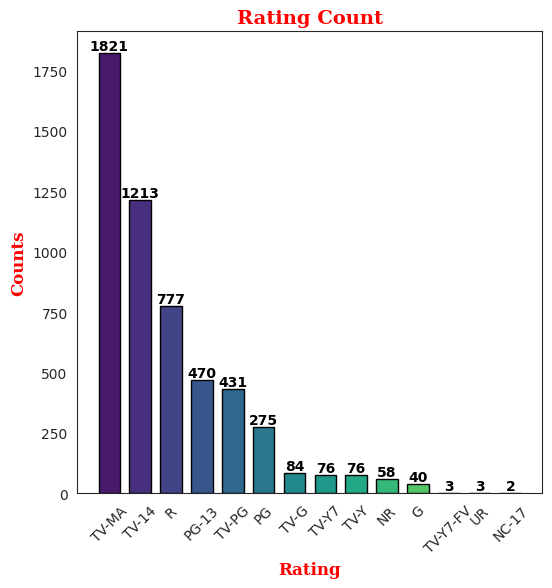

In [53]:
# barplot to compare the rating of movies and tv shows

x = rating_netdf['rating']
y = rating_netdf['count']

plt.figure(figsize = (6,6))
sns.set_style("white")
colors = sns.color_palette("viridis", len(x))  # Gradient color palette
bars = plt.bar(x,y, width = 0.7, align = 'center', edgecolor = 'black', color = colors)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}',
             ha = 'center', va = 'bottom', fontsize = 10, fontweight = 'bold', color = 'black')


plt.title('Rating Count', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Rating', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Counts', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xticks(rotation = 45)
plt.show()

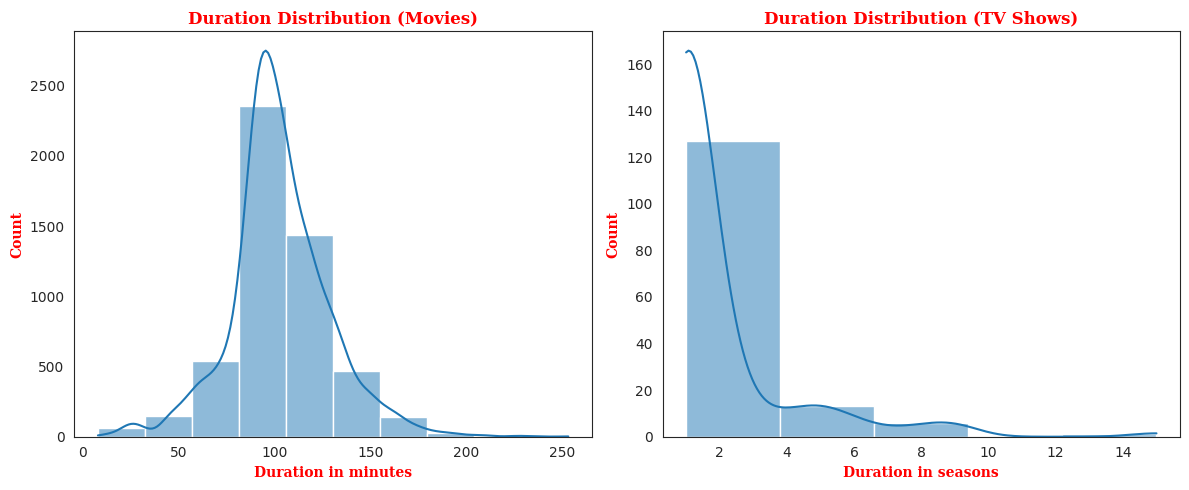

In [54]:
# Function to extract duration value
def extract_duration(duration):
    if pd.isna(duration):
        return None
    if 'min' in duration:
        return int(duration.split(' ')[0])
    elif 'Season' in duration or 'Seasons' in duration:
        return int(duration.split(' ')[0])
    return None

# Apply preprocessing
netdf['duration_value'] = netdf['duration'].apply(extract_duration)

# Filter out None values and create separate plots for movies and TV shows
movies = netdf[netdf['type'] == 'Movie'].dropna(subset = ['duration_value'])
tv_shows = netdf[netdf['type'] == 'TV Show'].dropna(subset = ['duration_value'])

# histplot/kdeplot for movies (duration in minutes)
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data = movies, x = 'duration_value', bins = 10, kde = True)
plt.title('Duration Distribution (Movies)', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Duration in minutes', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Count', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)

# histplot/kdeplot for TV shows (duration in seasons)
plt.subplot(1, 2, 2)
sns.histplot(data = tv_shows, x = 'duration_value', bins = 5, kde = True)
plt.title('Duration Distribution (TV Shows)', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Duration in seasons', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Count', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)

plt.tight_layout()
plt.show()

# Bivariate Visualization

In [55]:
netdf

,type,title,director,cast,country,release_year,rating,duration,listed_in,duration_value
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",9
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",104
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niew̦hner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",127
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",166
...,...,...,...,...,...,...,...,...,...,...
5327,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",96
5328,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",158
5329,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",88
5330,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies",88


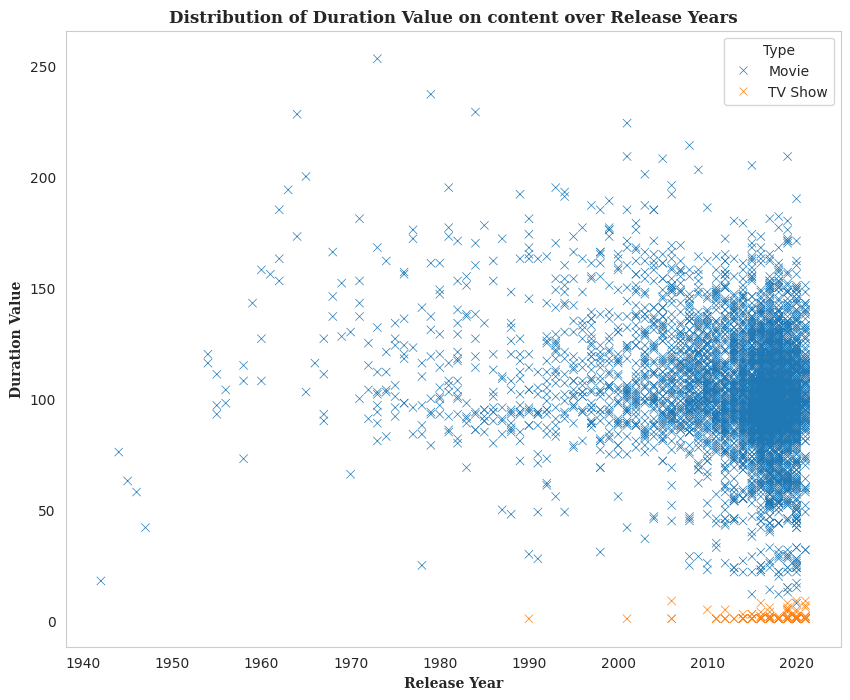

In [56]:
# Distribution of duration value on content creation over the release_years

sns.set_style("whitegrid")
plt.figure(figsize = (10, 8))
sns.scatterplot(data = netdf, x = 'release_year', y = 'duration_value', hue = 'type', marker = 'x')
plt.title('Distribution of Duration Value on content over Release Years', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Release Year', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Duration Value', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.legend(title = 'Type', loc = 'best')
plt.grid(False)
plt.show()

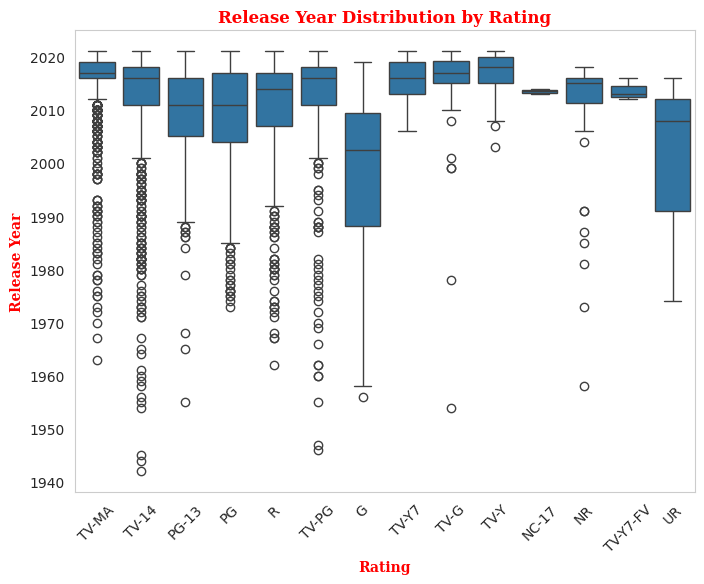

In [57]:
# Box Plot of release_year by rating to compare release years across different ratings

plt.figure(figsize = (8,6))
sns.boxplot(x = 'rating', y = 'release_year', data = netdf)
plt.xticks(rotation = 45)
plt.title('Release Year Distribution by Rating')
plt.title('Release Year Distribution by Rating', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Rating', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Release Year', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)
plt.show()

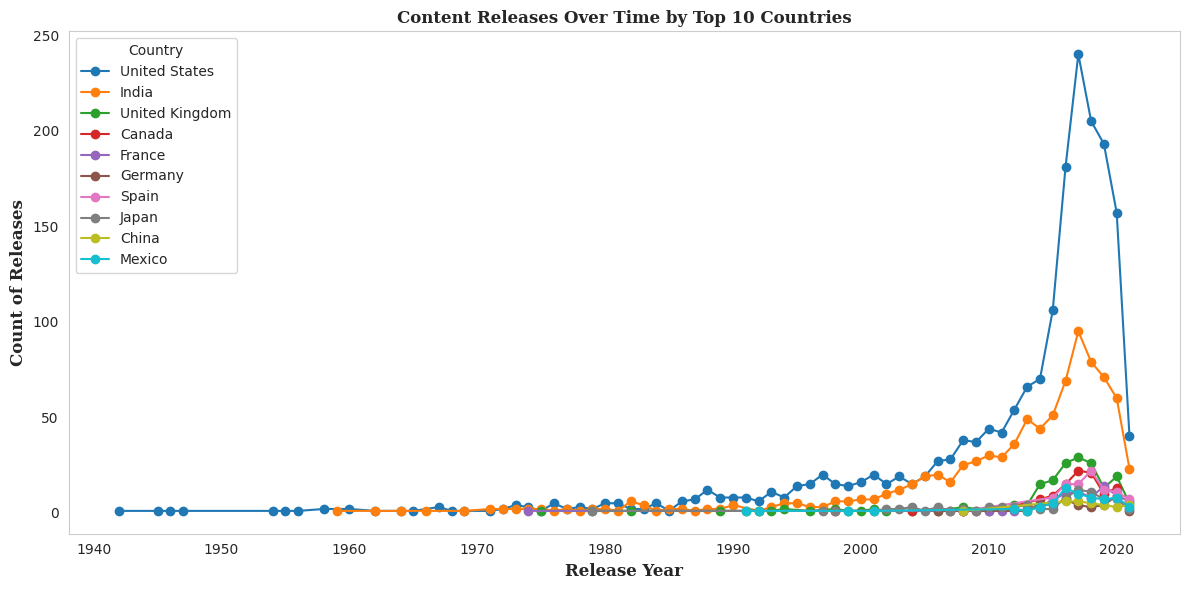

In [58]:
# Filter netdf for top 10 countries
top_countries = country_netdf_filtered['country_name'].head(10).tolist()
filtered_netdf = netdf[netdf['country'].isin(top_countries)].copy()

# Aggregate data
release_counts = filtered_netdf.groupby(['release_year', 'country']).size().reset_index(name='count')

# Plot line chart to visualize content release over time by top 10 countries
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = release_counts[release_counts['country'] == country]
    plt.plot(country_data['release_year'], country_data['count'], marker='o', label=country)

plt.title('Content Releases Over Time by Top 10 Countries', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Release Year', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Count of Releases', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.legend(title = 'Country', loc = 'best')
plt.grid(False)
plt.tight_layout()
plt.show()

**The plot suggests that post year 2000, modern content, wide variery of content on various genres were being produced in countries all over the globe.**

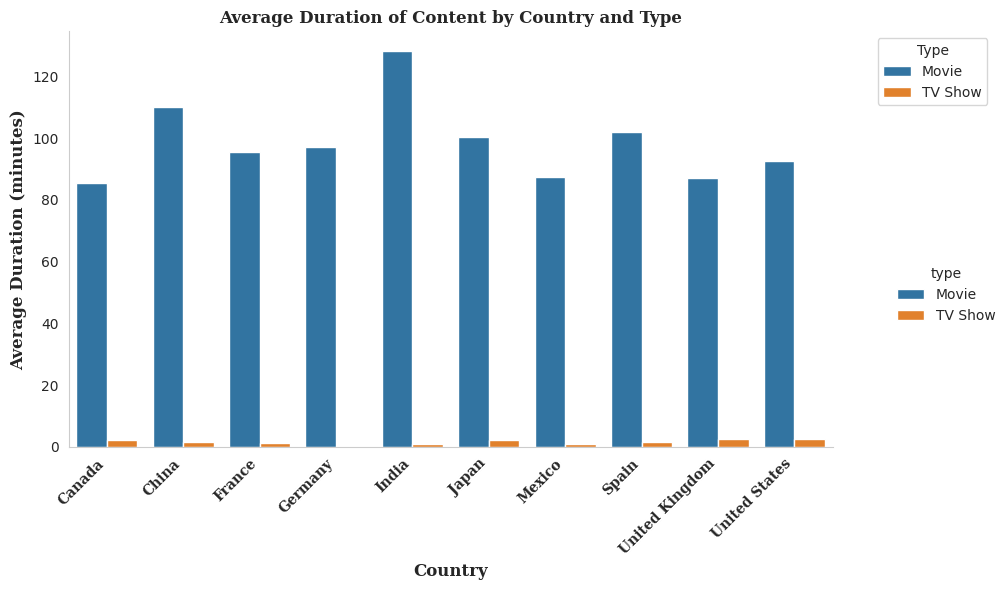

In [59]:
# Preprocess duration
filtered_netdf['duration_value'] = filtered_netdf['duration'].apply(extract_duration)

# Aggregate data to get average duration per country and type
avg_duration_df = filtered_netdf.groupby(['country', 'type'])['duration_value'].mean().reset_index()

# Create a catplot to visualize average duration per country and type
sns.set_style("whitegrid")
sns.catplot(x = 'country', y = 'duration_value', hue = 'type', kind = 'bar', data = avg_duration_df, height = 6, aspect = 1.5, errorbar = ('ci', False))
plt.title('Average Duration of Content by Country and Type', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Country', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Average Duration (minutes)', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xticks(rotation = 45, ha = 'right', fontweight = 'bold', fontname = 'Serif')
plt.legend(title = 'Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.grid(False)
plt.show()

<Figure size 1600x1600 with 0 Axes>

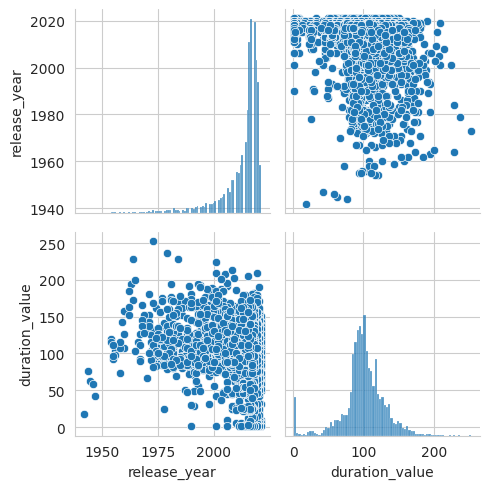

In [60]:
# Pairplot on the data

sns.set_style("whitegrid")
plt.figure(figsize = (16, 16))
sns.pairplot(data = netdf)
plt.grid(False)
plt.tight_layout()
plt.show()

**The distribution for release_year shows a peak around 2000–2020. This suggests that the majority of the content in the dataset is relatively recent, modern content. Most content has a duration of around 100 minutes, which is typical for movies. The presence of values with longer durations suggests some extended films/content.**

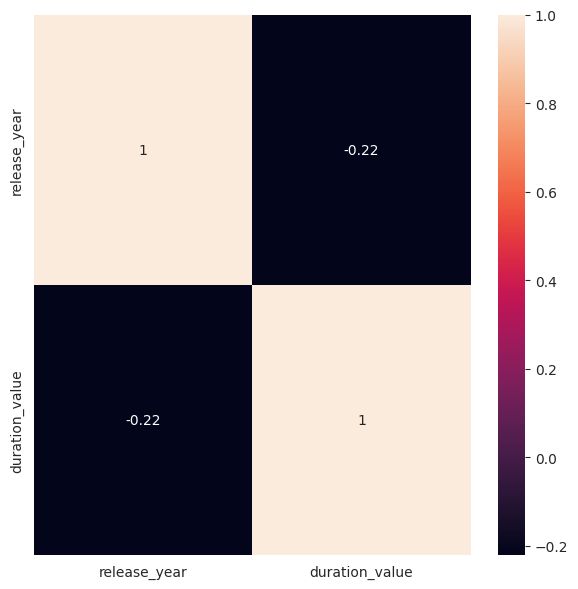

In [61]:
# Heatmap on the numeric columns of the data

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
sns.heatmap(netdf.corr(numeric_only = True),annot = True)
plt.grid(False)
plt.tight_layout()
plt.show()

**The heatmap shows that release_year and duration_value are negatively correlated.**

# Insights and Recommendations:



1.   Over the last few decades, the number of movies/tv shows increased exponentially compared to the period upto 1990s. Content based on various genres were being produced by countries all over the world.

2. More focus is on movies compared to tv shows. A recommendation would be to produce more tv shows and collect more data on tv shows.

3. Data and exploratory data analysis suggests that the modern era calls for more content to launch more tv shows. The audience look forward to series with multiple seasons.

4. United States, India, United Kingdom are the top countries that produce the most content, have more directors and actors creating and acting in a vast scope of genres.

5. Action, comedy, thriller, romance, horror, crime are among the top performing genres.